## CS 498 AML HW 3<br>
Kenneth Zhang (kfzhang2)<br>
Kirsten Wong (kewong2)<br>
Roshan Rajan (rjrajan2)<br>

4.10. CIFAR-10 is a dataset of 32x32 images in 10 categories, collected by Alex
Krizhevsky, Vinod Nair, and Geoffrey Hinton. It is often used to evaluate
machine learning algorithms. You can download this dataset from https://www.cs.toronto.edu/∼kriz/cifar.html.

## Initialization
Here, we read in the training examples and combine them into a single matrix. We also combine their respective labels into a vector, in the same order corresponding to the examples.

In [99]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [100]:
# Method for loading image data into dictionary.
def unpickle(file):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [3]:
# Loads data from cifar folder into dictionary. (Make sure folder is in same directory as this notebook.)
import os
dirname = os.getcwd()

# Load entire batch; each has 10,000 images and labels. Maybe combine them into one matrix?
db1 = unpickle(dirname+'/cifar-10-batches-py/data_batch_1')
db2 = unpickle(dirname+'/cifar-10-batches-py/data_batch_2')
db3 = unpickle(dirname+'/cifar-10-batches-py/data_batch_3')
db4 = unpickle(dirname+'/cifar-10-batches-py/data_batch_4')
db5 = unpickle(dirname+'/cifar-10-batches-py/data_batch_5')

# Load test batch
testb = unpickle(dirname+'/cifar-10-batches-py/test_batch')

In [101]:
# Combine examples and labels into their own matrices

all_data = np.concatenate((db1['data'],db2['data']),0)
all_data = np.concatenate((all_data,db3['data']),0)
all_data = np.concatenate((all_data,db4['data']),0)
all_data = np.concatenate((all_data,db5['data']),0)

all_lbls = np.concatenate((db1['labels'],db2['labels']),0)
all_lbls = np.concatenate((all_lbls,db3['labels']),0)
all_lbls = np.concatenate((all_lbls,db4['labels']),0)
all_lbls = np.concatenate((all_lbls,db5['labels']),0)


In [119]:
# Reshapes RGB array, converts to uint8, and displays image
def printImg(data):
    im = np.reshape(data,(3,1024))
    im = np.transpose(im)
    im.shape
    im = np.reshape(im,(32,32,3))
    im.astype('uint8')
    plt.imshow(im, interpolation='nearest')
    plt.figure()

In [103]:
# Dataset size
d_size = 50000

### Problem 4.10 a

In [104]:
# ==============
# Problem 4.10 a
# ==============

# (a) For each category, compute the mean image and the first 20 principal
# components. Plot the error resulting from representing the images of each
# category using the first 20 principal components against the category.

# Loop through batches to find mean image
curr_total = np.zeros((10,3072))
curr_matches = np.zeros(10)

for i in range(0,d_size):
    curr_total[all_lbls[i]] += all_data[i]
    curr_matches[all_lbls[i]] += 1



[ 115.0976  114.2104  114.7332 ...,  101.7988  101.6314  102.0214]


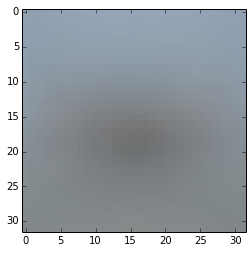

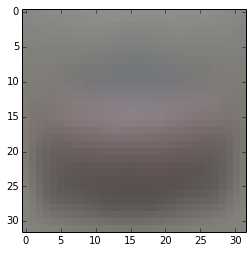

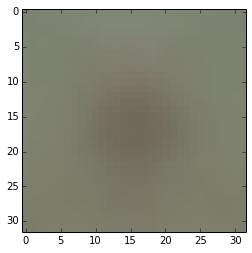

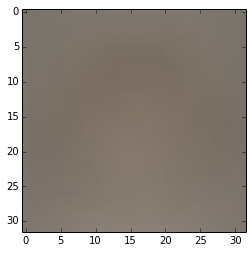

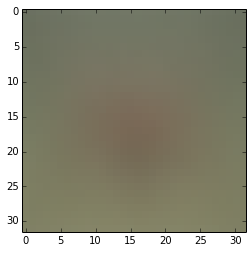

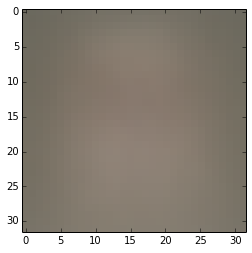

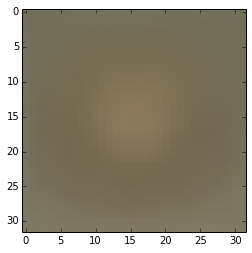

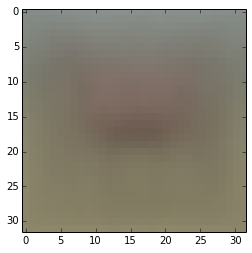

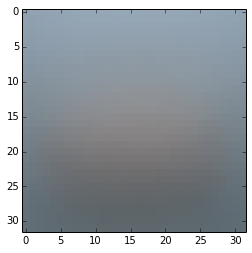

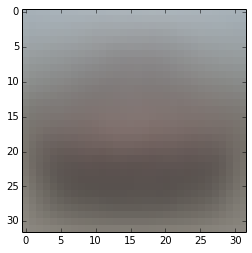

In [105]:
for i in range(0,curr_total.shape[0]):
    curr_total[i] /= curr_matches[i]

print curr_total[all_lbls[0]]
    
curr_total = curr_total.astype('uint8')    
       

    
for i in range(0,curr_total.shape[0]):
    printImg(curr_total[i])
    

In [97]:
# Separate all_data by label

all_data_lbls = np.zeros((10, 5000, 3072))

for lbl in range(0, 10):
    lbl_idxs = [x for x in range(0,all_lbls.shape[0]) if all_lbls[x] == lbl]
    for i in range(0,len(lbl_idxs)):
        all_data_lbls[lbl][i] += all_data[lbl_idxs[i]]
    

In [111]:
# ==============
# Problem 4.10 a (continued)
# ==============

# Run PCA on dataset, 
from sklearn import decomposition



pca_0 = decomposition.PCA(n_components = 20)
pca_1 = decomposition.PCA(n_components = 20)
pca_2 = decomposition.PCA(n_components = 20)
pca_3 = decomposition.PCA(n_components = 20)
pca_4 = decomposition.PCA(n_components = 20)
pca_5 = decomposition.PCA(n_components = 20)
pca_6 = decomposition.PCA(n_components = 20)
pca_7 = decomposition.PCA(n_components = 20)
pca_8 = decomposition.PCA(n_components = 20)
pca_9 = decomposition.PCA(n_components = 20)

pcas = [pca_0, pca_1, pca_2, pca_3, pca_4, pca_5, pca_6, pca_7, pca_8, pca_9]

for i in range(len(pcas)):
    pcas[i].fit(all_data_lbls[i])




(3072,)


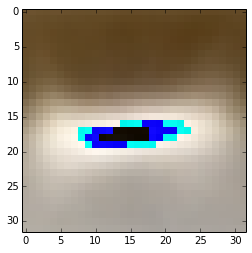

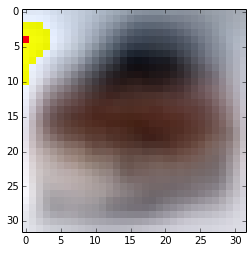

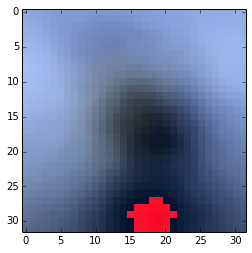

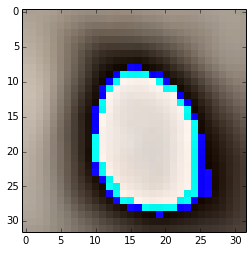

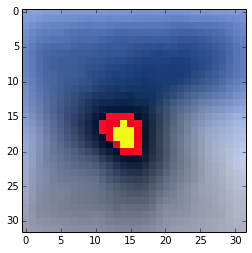

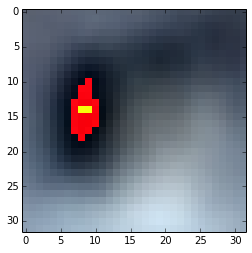

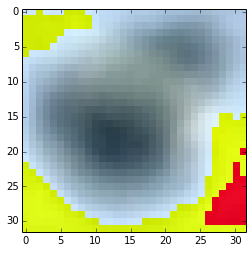

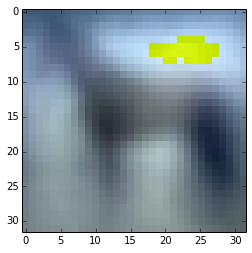

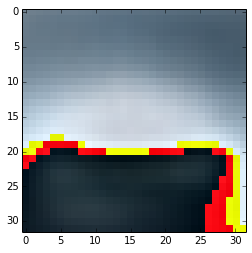

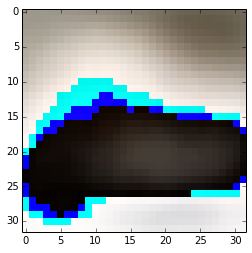

In [264]:
pca_img_1 = np.dot(pcas[1].explained_variance_,pcas[1].components_)
pca_img_1 /= (140757.181678 - 7561.42992042)
print(pca_img_1.shape)
pca_imgs = np.zeros((10, 3072))

for i in range(0, 10):
    pca_img = np.dot(pcas[i].explained_variance_,pcas[i].components_)
    pca_imgs[i] = pca_img/(np.max(pca_img) - np.min(pca_img))
    printImg(pca_imgs[i])

In [ ]:
# Calculate error from taking first 20 principal components of data for each label
# X_i - X_ihat where X_ihat is X_i, except with the first



### Problem 4.10 b

In [ ]:
# ==============
# Problem 4.10 b
# ==============

# (b) Compute the distances between mean images for each pair of classes. Use
# principal coordinate analysis to make a 2D map of the means of each
# categories. For this exercise, compute distances by thinking of the images
# as vectors.

cls_dists = np.zeros((10,10))
for i in range(0,curr_total.shape[0]-1):
    for j in range(i+1,curr_total.shape[0]):
        cls_dists[i,j] = np.linalg.norm(curr_total[i]-curr_total[j])
        cls_dists[j,i] = np.linalg.norm(curr_total[i]-curr_total[j])

In [ ]:
# Make a 2D map of all categories



### Problem 4.10 c

In [ ]:
# ==============
# Problem 4.10 c
# ==============

# (c) Here is another measure of the similarity of two classes. For class A and
# class B, define E(A → B) to be the average error obtained by representing
# all the images of class A using the mean of class A and the first 20 principal
# components of class B. Now define the similarity between classes to be
# (1/2)(E(A → B)+E(B → A)). Use principal coordinate analysis to make
# a 2D map of the classes. Compare this map to the map in the previous
# exercise – are they different? why?


